밑바닥부터 시작하는 딥러닝 2
# 1.3 신경망의 학습

## 손실함수(Loss Function)

-> 하나의 데이터에 대해 실제값과 예측값의 차이를 정의하는 함수
    
-> 신경망에서는 주로 CEE 사용

* MSE (Mean squarred error: 평균 제곱오차)- 주로 Regression 문제에 사용
* CEE (Cross entropy error: 교차 엔트로피 오차)- 주로 Classification 문제에 사용(원핫인코딩 한 경우에만)

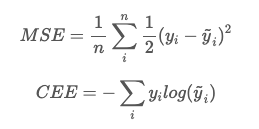

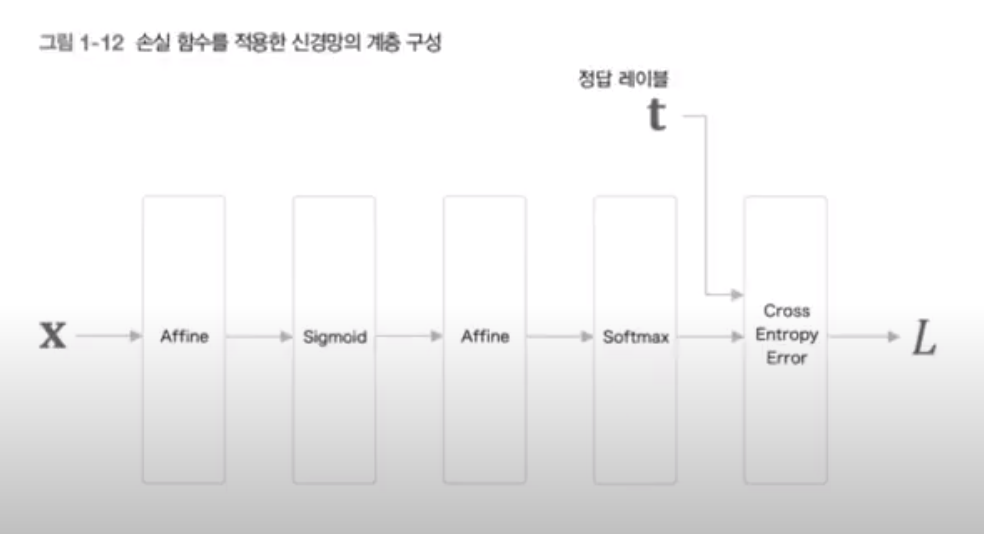

## 계산 그래프

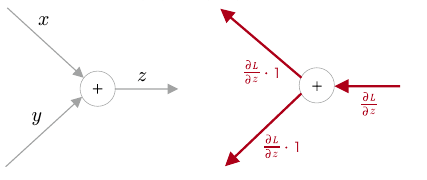

왼쪽: 순전파, 오른쪽: 역전파

In [1]:
# Repeat 노드

import numpy as np

D, N = 8, 7
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis = 0) # 순전파
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis = 0, keepdims = True) # 역전파

print(x)
print('-'* 50)
print(y)
print('-'* 50)
print(dy)
print('-'* 50)
print(dx)

[[-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]]
--------------------------------------------------
[[-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]
 [-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]
 [-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]
 [-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]
 [-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]
 [-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]
 [-0.22994031  0.4796395  -0.31163069 -1.37948943  0.46937576 -0.84572195
  -0.81609897  0.05661358]]
--------------------------------------------------
[[-0.07080907  0.86338625 -1.03121178  0.06987687 -0.57834144  0.19146554
  -0.64570999 

* 복제

In [2]:
# Sum 노드

D, N = 8, 7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis =  0, keepdims = True) #순전파

dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis = 0) # 역전파

print(x)
print('-'* 50)
print(y)
print('-'* 50)
print(dy)
print('-'* 50)
print(dx)

[[ 7.21146581e-01 -6.26898570e-01  1.55858928e+00  5.96310293e-01
   1.08082930e+00  8.84578925e-01 -3.42056338e-01  3.41073536e-01]
 [-9.64372678e-01 -1.78049243e+00  1.25627102e+00  6.07673758e-01
  -9.14868155e-01 -1.56765302e-01 -5.69821761e-01  5.81764149e-01]
 [ 1.12727316e+00  2.26992507e+00  9.34621020e-01 -1.26970785e-01
  -1.79431494e+00 -5.19712522e-02 -2.25495759e+00 -3.31146966e-03]
 [-6.43058924e-03  5.65203960e-01 -6.83526013e-01  1.36424983e-01
  -1.82962590e+00  4.11882457e-01 -1.09462709e-01  3.37641574e-01]
 [ 1.47718982e+00  7.78150956e-01  4.04514090e-01  2.59417828e-01
  -1.71993085e+00 -1.51452001e-01 -1.77309130e+00 -5.17589975e-02]
 [ 9.98809477e-03  9.10737210e-02 -8.45800161e-02 -2.67020573e-01
   4.03082297e-01  7.99461247e-01 -5.29219585e-01  1.92086677e+00]
 [-3.86535541e-01  2.63205527e-02 -2.37706834e+00 -2.46699413e-01
   6.60484111e-01  5.69421571e-01  1.01157881e+00  4.06655202e+00]]
--------------------------------------------------
[[ 1.97825885  1.

* 합

In [3]:
# MatMul 노드

class MatMul:
    def __init__(self, W):
        self.params = [w] # 매개변수 보관
        self.grades = [np.zeros_like(W)] # 기울기 보관
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dw # 깊은 복사
        return dx

## 기울기 도출과 역전파 구현

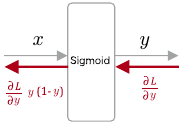

In [4]:
# Sigmoid 계층

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [],[]
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

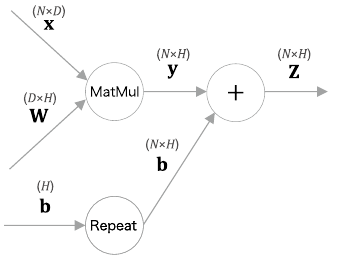

In [5]:
# Affine 계층

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_loke(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.parmas
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self, x.T, dout)
        db = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

* 순전파는 y = np.matmul(x, W) + b
* 역전파는 MatMul 노드와 Repeat 노드의 역전파를 수행
* Repeat 노드의 역전파는 np.sum() 메서드로 계산 가능

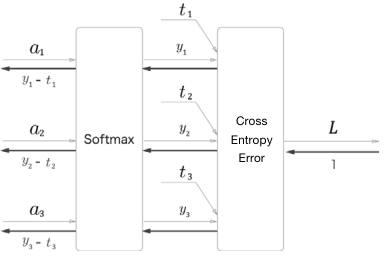

In [6]:
# Softmax with Loss 계층

## 가중치 갱신

#### 신경망 학습 순서

* 미니배치 - 훈련 데이터 중에서 무작위로 다수의 데이터를 골라낸다.
* 기울기 계산 - 오차역전파법으로 각 가중치 매개변수에 대한 손실 함수의 기울기를 구한다.
* 매개변수 계산 - 기울기를 사용해 가중치 매개변수를 갱신한다.
* 반복 - 1~3단계 필요한 만큼 반복


#### 경사 하강법(GD)

-> 기울기의 절댓값이 낮은 쪽으로 계속 이동시키며 Loss Function이 최소가 되는 지점을 찾는 방법

* 손실함수가 복잡한 경우 미분으로 최솟값 찾기 힘들기 때문에 경사하강법 사용
* 전체 데이터에 대해 기울기를 계산하여 진행하기 때문에 노이즈 우려할 필요 없음

#### 확률적 경사 하강법 (SGD)

-> 랜덤하게 추출한 하나의 데이터만 계산해 빠르게 다음 스탭으로 넘어가 최적해를 찾는 방법

* 무작위로 추출하기 떄문에 국소 최적해에 빠질 가능성 감소
* 기존 경사 하강법보다 빠름
* 노이즈 심함

In [7]:
class SGD:
    def __init__(self, lr = 0.01): # lr: 학습률
        self.lr = lr
    
    def update(self, params, grads): #params:가중치, grads:기울기
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

#### 아다그라드(AdaGrad)

-> Loss Function의 기울기가 큰 첫부분에서는 크게 학습하다가, 최적점에 가까워질수록 학습률을 줄여 조금씩 적게 학습하는 학습률 감소 기법을 적용한 방법

* 효율적으로 학습
* 각각의 변수마다 적합한 학습률 자동 설정

#### RMSprop

-> AdaGrad의 학습이 오래 진행될수록 학습률이 감소해 정체되는 단점 극복

* 기울기 업데이트 시 지수 가중 이동 평균 사용

#### 모맨텀(Momentum)

-> 기울기 방향으로 힘을 받으면 물체가 가속된다는 관성을 확률 경사 하강법에 더함

* 관성의 힘으로 국소 최적해에서 빠져나오는 효과

#### 아담(Adam)

-> 모맨텀 방식+ RMSProp 방식의 장점을 합침

* 최근 딥러닝에서 가장 많이 사용
* 어떤 손실함수에서도 안정적으로 최적화를 위한 경사 하강을 함